## Observations and Insights 

## FINDINGS FROM THIS EXERCISE
1. Capomulin and Ramicane appear to be the most effective treatments based on the final tumor size of mice subjects. 
3. Looking at the results from the placebo group, a lot of these treatments appear to be completely ineffective (Stelasyn, Zoniferol, etc). 
2. Mouse weight is a good proxy for tumor size (0.84 corr) in mice that are known to have tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_results = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview

complete_results

# Checking the number of mice.

rows = len(complete_results)

rows

1893

In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

new = complete_results[['Mouse ID','Timepoint']]
new = new[new.duplicated(keep=False)]
new

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [3]:
#Count all rows of duplicates.
rows = len(new)
rows

10

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = complete_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
rows = len(clean_results)
rows

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = clean_results.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
standard_deviation = grouped['Tumor Volume (mm3)'].std()
SEM = grouped['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

summary_stats = pd.DataFrame({'Mean' : mean, 'Median' : median, 'Variance' : variance, 'Standard Deviation' : standard_deviation, 'SEM' : SEM})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = pd.DataFrame({'Mean' : (grouped['Tumor Volume (mm3)'].mean()), 'Median' : (grouped['Tumor Volume (mm3)'].median()), 'Variance' : (grouped['Tumor Volume (mm3)'].var()), 'Standard Deviation' : (grouped['Tumor Volume (mm3)'].std()), 'SEM' : (grouped['Tumor Volume (mm3)'].sem())})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count')

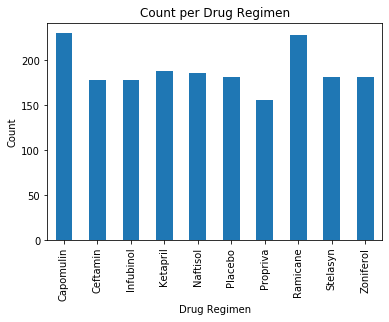

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data_count = grouped.count()['Mouse ID']
pandas_bar = data_count.plot.bar()
plt.title("Count per Drug Regimen")
plt.ylabel("Count")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

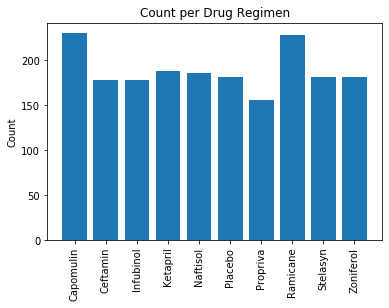

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimens = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
y_count = grouped.count()['Mouse ID']
plt.bar(drug_regimens, data_count)
plt.title("Count per Drug Regimen")
plt.ylabel("Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Male vs Female Used in Study')

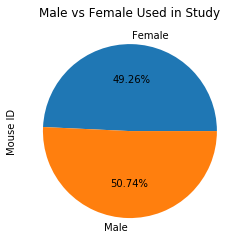

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#count male v. female
male_female = clean_results.groupby(['Sex']).count()

# get labels
labels = list(male_female.index)

#Get the number for each value
sizes = male_female['Mouse ID']

#plot the pie chart with percents and labels
plot = sizes.plot.pie(autopct='%1.2f%%')
plt.title("Male vs Female Used in Study")


Text(0.5, 1.0, 'Male vs Female Used in Study')

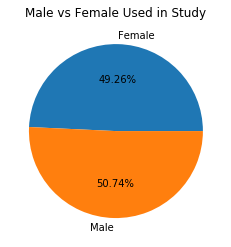

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, labels=labels, autopct="%1.2f%%")
plt.title('Male vs Female Used in Study')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:]
ramicane = clean_results.loc[clean_results["Drug Regimen"] == "Ramicane",:]
infubinol = clean_results.loc[clean_results["Drug Regimen"] == "Infubinol",:]
ceftamin = clean_results.loc[clean_results["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
last_capomulin = pd.DataFrame(capomulin.groupby('Mouse ID').max()['Timepoint'])
last_ramicane = pd.DataFrame(ramicane.groupby('Mouse ID').max()['Timepoint'])
last_infubinol = pd.DataFrame(infubinol.groupby('Mouse ID').max()['Timepoint'])
last_ceftamin = pd.DataFrame(ceftamin.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(last_capomulin, clean_results, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge = pd.merge(last_ramicane, clean_results, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge = pd.merge(last_infubinol, clean_results, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge = pd.merge(last_ceftamin, clean_results, on=("Mouse ID","Timepoint"),how="left")


capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_vol = []
ramicane_tumor_vol = []
infubinol_tumor_vol = []
ceftamin_tumor_vol =[]

In [15]:
#CAPOMULIN CALCS
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumor = capomulin_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_tumor.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

    # Determine outliers using upper and lower bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)   

print(f"Tumor volumes below {cap_lowerq} (mm3) or above {cap_upperq} (mm3) could be outliers for the Capomulin treatment.")

Tumor volumes below 32.37735684 (mm3) or above 40.1592203 (mm3) could be outliers for the Capomulin treatment.


In [16]:
#RAMICANE CALCS
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_tumor = ramicane_merge["Tumor Volume (mm3)"]
ram_quartiles = ram_tumor.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

    # Determine outliers using upper and lower bounds
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)   

print(f"Tumor volumes below {ram_lowerq} (mm3) or above {ram_upperq} (mm3) could be outliers for the Ramicane treatment.")

Tumor volumes below 31.56046955 (mm3) or above 40.65900627 (mm3) could be outliers for the Ramicane treatment.


In [17]:
#INFUBINOL CALCS
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_tumor = infubinol_merge["Tumor Volume (mm3)"]
inf_quartiles = inf_tumor.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

    # Determine outliers using upper and lower bounds
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)   

print(f"Tumor volumes below {inf_lowerq} (mm3) or above {inf_upperq} (mm3) could be outliers for the Infubinol treatment.")

Tumor volumes below 54.04860769 (mm3) or above 65.52574285 (mm3) could be outliers for the Infubinol treatment.


In [18]:
#CEFTAMIN CALCS
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceft_tumor = ceftamin_merge["Tumor Volume (mm3)"]
ceft_quartiles = ceft_tumor.quantile([0.25,0.5,0.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

    # Determine outliers using upper and lower bounds
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)   

print(f"Tumor volumes below {ceft_lowerq} (mm3) or above {ceft_upperq} (mm3) could be outliers for the Ceftamin treatment.")

Tumor volumes below 48.72207785 (mm3) or above 64.29983003 (mm3) could be outliers for the Ceftamin treatment.


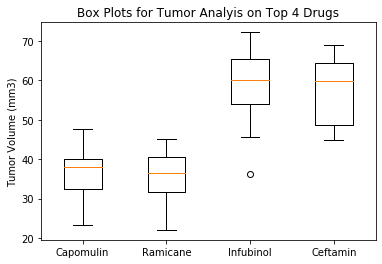

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [cap_tumor, ram_tumor, inf_tumor, ceft_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots for Tumor Analyis on Top 4 Drugs')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(boxplot, labels=treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

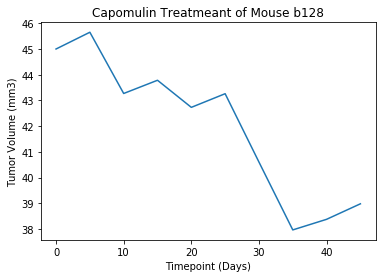

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Subject mouse = b128

cap_lineplot = capomulin.loc[capomulin["Mouse ID"] == "b128",:]
x_axis = cap_lineplot["Timepoint"]
tumor = cap_lineplot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatmeant of Mouse b128')
plt.plot(x_axis, tumor)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

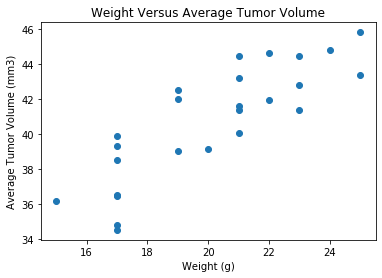

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
cap_vol = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(cap_vol['Weight (g)'],cap_vol['Tumor Volume (mm3)'])
plt.title('Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_vol['Weight (g)'],cap_vol['Tumor Volume (mm3)'])[0],2)
x_values = cap_vol['Weight (g)']
y_values = cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

lin_reg = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"correlation value =  {corr}")
print(lin_reg)

correlation value =  0.84
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


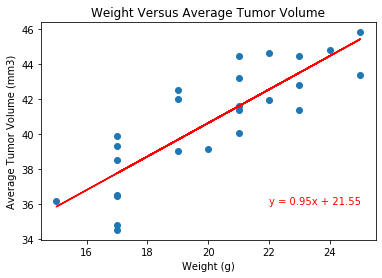

In [23]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(lin_reg, (22,36),color="red")
plt.title('Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()